In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

**<font size="4" color="red">ch2. 한글 형태소 분석</font>**
# 1. 자연어처리
- 자연어 : 일상적인 언어
- 자연어 처리 분야 : 
    * 자연어 이해 : 형태소 분석 -> postagging -> 의미 분석, 시각화
    * 자연어 생성 : RNN, LSTM, GRU, ... , encoder-decoder알고리즘 -> 트랜스포머알고리즘
- 활용분야 : 트랜드분석, 탐색적 분석, 맞춤법검사, 번역기, 챗봇, ...      

# 2. 자연어 이해 처리 절차
- 전처리 : 단어, 어절 추출
- 분석 후보 생성 : 형태소 분리, 품사태깅(pos tagging)
- 제약조건(불용어 처리) : 규칙 확인
- 분석 : 시각화(워드클라우드), 연관분석, RNN, LSTM, GRU, ...

# 3. 한글형태소 분석 엔진(Konlpy,...)
- 공통기능 : morphs(형태소 나누기), nouns(명사 추출), pos(형태소로 나누어 품사 태그)

- Konlpy (pip install konlpy)
    * KanNanum : 자바로 만든 형태소 분석기(JAVA_HOME 시스템 환경 변수, Path 설정)
    * KKma     : 자바로 만든 형태소 분석기(JAVA_HOME 시스템 환경 변수, Path 설정)
    * Komoran  : 자바로 만든 형태소 분석기(JAVA_HOME 시스템 환경 변수, Path 설정)
    * Okt
- Mecab (pip install python-mecab-ko)
    * Mecab : C++로 만든 형태소 분석기. 저사양환경에서 사용 가능. 다국어 바딩인 지원

In [2]:
import os
os.environ.get("JAVA_HOME")

'C:\\Program Files\\Java\\jdk-17'

In [3]:
text = '''아름답지만 다소 복잡하기도 한 한국어는 전세계에서 13번쨰로
많이 사용되는 언어입니다
'''

## 3.1 HanNanum

In [4]:
# %pip install konlpy

In [5]:
from konlpy.tag import Hannanum
hannanum = Hannanum(jvmpath=None,
                   max_heap_size=512) # 기본값:1024, '10m', '1g', 최대사이즈 4g
hannanum.analyze(text) #ntag=69로 형태소분석 후보

[[[('아름답', 'paa'), ('지만', 'ecs')],
  [('아름답', 'paa'), ('지', 'ecs'), ('만', 'jxc')],
  [('아름답', 'paa'), ('지', 'ecx'), ('말', 'px'), ('ㄴ', 'etm')]],
 [[('다소', 'mag')], [('다소', 'ncn')]],
 [[('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하', 'xsms'), ('기', 'etn'), ('도', 'jxc')]],
 [[('하', 'pvg'), ('ㄴ', 'etm')],
  [('한', 'nnc')],
  [('한', 'ncn')],
  [('한', 'nbn')],
  [('하', 'px'), ('ㄴ', 'etm')]],
 [[('한국어', 'ncn'), ('는', 'jxc')]],
 [[('전세계', 'ncn'), ('에서', 'jca')],
  [('전세', 'ncn'), ('계', 'ncn'), ('에서', 'jca')],
  [('전', 'xp'), ('세계', 'ncn'), ('에서', 'jca')]],
 [[('13번쨰', 'ncn'), ('로', 'jca')],
  [('13번쨰로', 'ncn')],
  [('13번쨰', 'nqq'), ('로', 'jca')],
  [('13번쨰로', 'nqq')]],
 [],
 [[('많', 'paa'), ('이', 'xsa')], [('많이', 'mag')]],
 [[('사용', 'ncpa'), ('되', 'xsvn'), ('는', 'etm')]],
 [[('언어', 'ncn'), ('이', 'jp'), ('ㅂ니다', 'ef')]]]

- 구글에서 konlpy docs 검색 https://konlpy.org/
- api 메뉴 -> "Comparison between POS tagging classes"클릭 -> Korean POS tags comparison chart클릭

In [6]:
# 형태소 분석 : morphs
print(hannanum.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '하', 'ㄴ', '한국어', '는', '전세계', '에서', '13번쨰', '로', '많', '이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [7]:
# 명사만 추출
print(hannanum.nouns(text))

['복잡', '한국어', '전세계', '13번쨰', '사용', '언어']


In [8]:
# 품사태그
print(hannanum.pos(text)) # 품사 개수 기본값 ntags=9

[('아름답', 'P'), ('지만', 'E'), ('다소', 'M'), ('복잡', 'N'), ('하', 'X'), ('기', 'E'), ('도', 'J'), ('하', 'P'), ('ㄴ', 'E'), ('한국어', 'N'), ('는', 'J'), ('전세계', 'N'), ('에서', 'J'), ('13번쨰', 'N'), ('로', 'J'), ('많', 'P'), ('이', 'X'), ('사용', 'N'), ('되', 'X'), ('는', 'E'), ('언어', 'N'), ('이', 'J'), ('ㅂ니다', 'E')]


In [9]:
print(hannanum.pos(text, ntags=22))

[('아름답', 'PA'), ('지만', 'EC'), ('다소', 'MA'), ('복잡', 'NC'), ('하', 'XS'), ('기', 'ET'), ('도', 'JX'), ('하', 'PV'), ('ㄴ', 'ET'), ('한국어', 'NC'), ('는', 'JX'), ('전세계', 'NC'), ('에서', 'JC'), ('13번쨰', 'NC'), ('로', 'JC'), ('많', 'PA'), ('이', 'XS'), ('사용', 'NC'), ('되', 'XS'), ('는', 'ET'), ('언어', 'NC'), ('이', 'JP'), ('ㅂ니다', 'EF')]


In [10]:
# 퀴즈1. text에서 형용사(PA)만 추출
tagged_text = hannanum.pos(text, ntags=22)
words = [token for token, tag in tagged_text if tag=='PA']
# for token, tag in tagged_text : 
#     if tag=='PA' :
#         words.append(token)
words

['아름답', '많']

In [11]:
# 퀴즈2. text에서 명사(NC, NQ, NB, NN, NP)만 추출
print([token for token, tag in tagged_text if tag.find('N')!= -1])
print([token for token, tag in tagged_text if (tag=='NC') |
                                              (tag=='NQ') |
                                              (tag=='NB') |
                                              (tag=='NN') |
                                              (tag=='NP')])
print([(token, tag) for token, tag in tagged_text if tag in ('NC', 'NQ', 'NB', 'NN', 'NP')])
print(hannanum.nouns(text))

['복잡', '한국어', '전세계', '13번쨰', '사용', '언어']
['복잡', '한국어', '전세계', '13번쨰', '사용', '언어']
[('복잡', 'NC'), ('한국어', 'NC'), ('전세계', 'NC'), ('13번쨰', 'NC'), ('사용', 'NC'), ('언어', 'NC')]
['복잡', '한국어', '전세계', '13번쨰', '사용', '언어']


In [12]:
# 퀴즈3. text에서 보통명사만 추출
[token for token, tag in tagged_text if tag=='NC']

['복잡', '한국어', '전세계', '13번쨰', '사용', '언어']

## 3.2 Kkma

In [13]:
from konlpy.tag import Kkma
kkma = Kkma(jvmpath=None,
            max_heap_size="4g") # "4m", "4g" 등
# 형태소 분석
print(kkma.morphs(text)) 

java.lang.OutOfMemoryError: java.lang.OutOfMemoryError: Java heap space

In [ ]:
# 명사추출
print(kkma.nouns(text)) 

In [ ]:
# 품사 태깅
print(kkma.pos(text)) # ntags 지정 불가(무조건 56으로)

In [ ]:
# 명사 추출
tagged_text = kkma.pos(text)
print([word for word, tag in tagged_text if tag in ('NNG','NNP','NNB') ])

## 3.3 Komoran

In [ ]:
from konlpy.tag import Komoran
komoran = Komoran()
# 형태소 분석
print(komoran.morphs(text))

In [ ]:
# 명사 추출
print(komoran.nouns(text))

In [ ]:
# 품사 태깅
print(komoran.pos(text)) # ntags 조정 불가

In [ ]:
# 일반명사, 고유명사만 추출
[token for token, tag in komoran.pos(text) if tag in ('NNG', 'NNP')]

## 3.4 Twitter(Okt; Open Korean Text)
- konlpy v0.4.5 부터 Twitter -> Okt로 바뀜

In [20]:
import konlpy
konlpy.__version__

'0.6.0'

In [21]:
%%time
from konlpy.tag import Twitter, Okt
# okt = Twitter()
okt = Okt() # max_heap_size
# print('구 추출 : ', okt.phrases(text))
print('형태소 추출 : ', okt.morphs(text))
print('명사 추출 : ', okt.nouns(text))
tagged_text = okt.pos(text)
print('품사 태깅을 이용한 명사 추출 : ', 
      [token for token, tag in tagged_text if tag=='Noun'])
print('품사 태깅 : ', tagged_text)

java.lang.OutOfMemoryError: java.lang.OutOfMemoryError: Java heap space

## 3.5 Mecab
- pip install mecab

In [22]:
%%time
from mecab import MeCab
mecab = MeCab() # 힙메모리 사이즈 지정 불가
print('형태소 추출 : ', mecab.morphs(text))
print('명사 추출 : ', mecab.nouns(text))
tagged_text = mecab.pos(text) # ntags 조정 불가(ntags=43 고정)
print('품사 태깅을 이용한 명사 추출 : ',
      [token for token, tag in tagged_text if tag=='Noun'])
print('품사태깅 : ', tagged_text)

형태소 추출 :  ['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '쨰로', '많이', '사용', '되', '는', '언어', '입니다']
명사 추출 :  ['한국어', '세계', '번', '사용', '언어']
품사 태깅을 이용한 명사 추출 :  []
품사태깅 :  [('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNG'), ('는', 'JX'), ('전', 'MM'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNBC'), ('쨰로', 'UNKNOWN'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('입니다', 'VCP+EC')]
CPU times: total: 0 ns
Wall time: 4.01 ms


# 4. 말뭉치

In [23]:
# 영어 말뭉치
import nltk
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')

In [24]:
# 한국어 말뭉치
# %pip show konlpy

In [25]:
# 한국어 말뭉치
from konlpy.corpus import kolaw
# data = kolaw.open('constitution.txt').readlines() # 한줄씩 list로 반환
data = kolaw.open('constitution.txt').read()
print("글자 수 : ", len(data))
print("%r" % data[:100])

글자 수 :  18884
'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의'


# 5. 워드 클라우드
- pip install wordcloud

In [26]:
l = ['aaa', 'bbb', 'ccc', 'aaa']
' '.join(l)

'aaa bbb ccc aaa'

In [27]:
# 말뭉치에서 단어 추출(특수문자 제외)
from nltk.tokenize import RegexpTokenizer
from nltk.tag import pos_tag
ret = RegexpTokenizer('[\w]{2,}')
words = ret.tokenize(emma)
# 명사만 추출
emma_tags = pos_tag(words)
noun_list = [token for token, tag in emma_tags if tag in ('NN', 'NNS')]
print("추출된 명사 갯수 : ",len(noun_list), "\t단어 종류 수 : ",len(set(noun_list)))
print("noun_list : ", noun_list[:10])
emma_noun = ' '.join(noun_list)
print("워드 클라우드에 필요한 내용 : ",emma_noun[:100])

추출된 명사 갯수 :  22362 	단어 종류 수 :  3498
noun_list :  ['Emma', 'clever', 'home', 'disposition', 'blessings', 'existence', 'years', 'world', 'daughters', 'indulgent']
워드 클라우드에 필요한 내용 :  Emma clever home disposition blessings existence years world daughters indulgent father consequence 


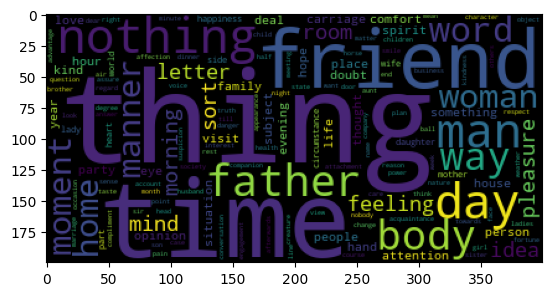

In [28]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wordc = WordCloud()
wordc.generate(emma_noun)
plt.imshow(wordc)
plt.show()

- 컬러맵
    - https://matplotlib.org/stable/users/explain/colors/colormaps.html

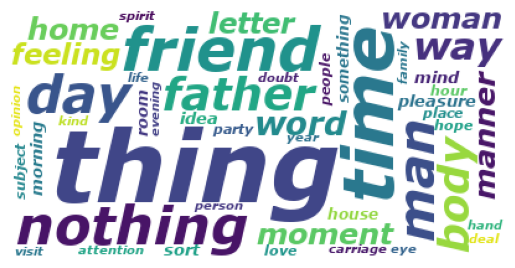

In [29]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/Verdana/verdanaz.ttf',
                    #width=800, # 생성될 이미지 가로(픽셀)
                    background_color='white', # 배경색
                    max_words=300, # 표시될 단어의 최대갯수
                    relative_scaling=0.9, # 단어 빈도에 따른 크기 차이 조정
                    colormap='viridis', # 글씨 컬러맵
                    max_font_size=80, #최대 폰트 사이즈
                    min_font_size=10  #최소 사이즈
)
wordcloud.generate(emma_noun)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [30]:
# 한글 말뭉치 data로 워드클라우드 시각화
from konlpy.tag import Hannanum, Kkma, Komoran, Okt
from mecab      import MeCab
analyzer = MeCab()
noun_list = analyzer.nouns(data)
noun_list = [word for word, tag in analyzer.pos(data) \
              if tag in ('NNG', 'NNP')]
data_noun = ' '.join(noun_list)
data_noun[:100]

'대한민국 헌법 역사 전통 국민 운동 건립 대한민국 임시 정부 법통 불의 항거 민주 이념 계승 조국 민주 개혁 평화 통일 사명 입각 정의 인도 동포 애 민족 단결 사회 폐습 불의 타'

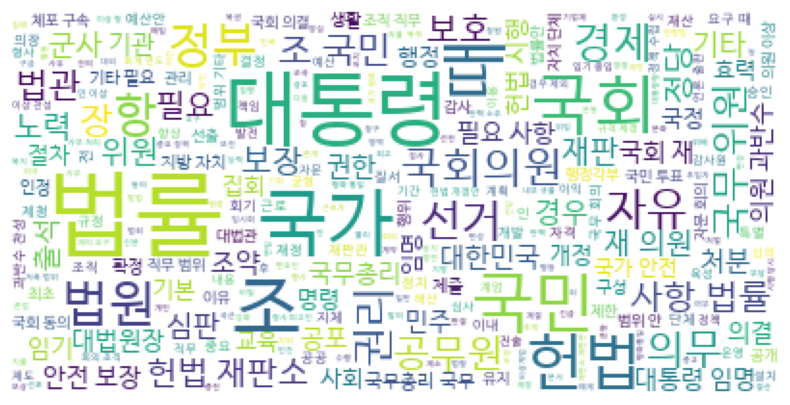

In [31]:
wordcloud = WordCloud(
                font_path='C:/Windows/Fonts/한컴 고딕/Hancom Gothic Regular.ttf',
                # width=800, # 생성될 이미지 가로(픽셀)
                background_color='white', # 배경색
                max_words=300, # 표시될 단어의 최대갯수
                #relative_scaling=0.9, # 단어 빈도에 따른 크기 차이 조정
                colormap='viridis', # 글씨 컬러맵
                #random_state=3
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [32]:
# 불용어 처리(불용어지정 + 불용어사전)
from wordcloud import STOPWORDS
불용어 = STOPWORDS | {'대통령', '법률'} # | : 집합합연산자
불용어 = set(['대통령','법률'])
불용어 = {'대통령','법률','조'}
불용어

{'대통령', '법률', '조'}

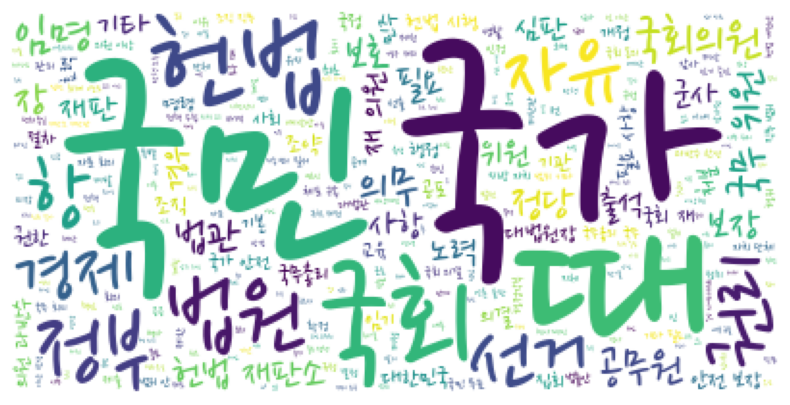

In [33]:
wordcloud = WordCloud(
                #font_path='C:/Windows/Fonts/한컴 고딕/Hancom Gothic Regular.ttf',
                font_path='data/NanumPenScript-Regular.ttf',
                # width=800, # 생성될 이미지 가로(픽셀)
                background_color='white', # 배경색
                max_words=300, # 표시될 단어의 최대갯수
                #relative_scaling=0.9, # 단어 빈도에 따른 크기 차이 조정
                colormap='viridis', # 글씨 컬러맵
                #random_state=3,
                stopwords=불용어
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(468, 720, 3)

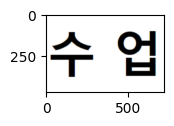

In [34]:
# 마스킹 : 워드클라우드를 지정된 마스크 이미지에 맞도록 설정
# 이미지를 넘파이 배열로 방법1
from PIL import Image
import numpy as np
img = Image.open('data/test.png')
mask = np.array(img)
plt.figure(figsize=(2,1))
plt.imshow(mask)
mask.shape

(468, 720, 3)

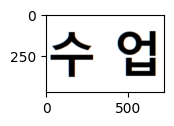

In [35]:
# 이미지를 넘파이 배열로 방법2
import cv2
# %pip install opencv-contrib-python
mask = cv2.imread('data/test.png'
                 # , cv2.IMREAD_GRAYSCALE
                 )
plt.figure(figsize=(2,1))
plt.imshow(mask)
mask.shape

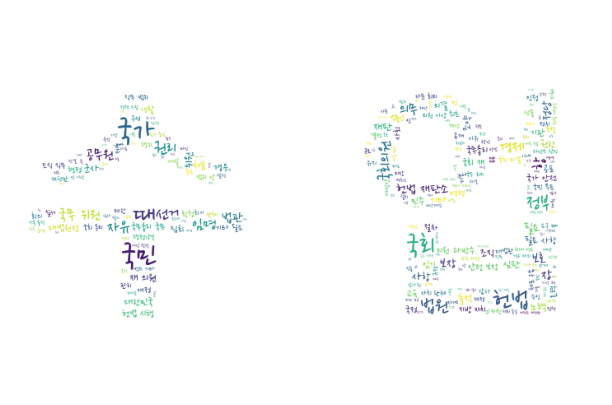

In [36]:
wordcloud = WordCloud(
                #font_path='C:/Windows/Fonts/한컴 고딕/Hancom Gothic Regular.ttf',
                font_path='data/NanumPenScript-Regular.ttf',
                # width=800, # 생성될 이미지 가로(픽셀)
                background_color='white', # 배경색
                max_words=300, # 표시될 단어의 최대갯수
                #relative_scaling=0.9, # 단어 빈도에 따른 크기 차이 조정
                colormap='viridis', # 글씨 컬러맵
                #random_state=3,
                stopwords=불용어,
                mask=mask
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

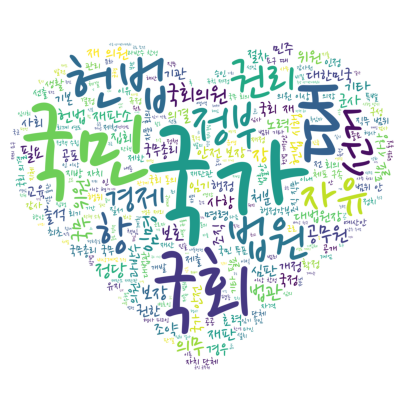

In [37]:
mask2 = cv2.imread('data/heart.jpg')
# plt.figure(figsize=(2,2))
# plt.imshow(mask2)
mask2.shape
wordcloud = WordCloud(
                #font_path='C:/Windows/Fonts/한컴 고딕/Hancom Gothic Regular.ttf',
                font_path='data/NanumPenScript-Regular.ttf',
                # width=800, # 생성될 이미지 가로(픽셀)
                background_color='white', # 배경색
                max_words=300, # 표시될 단어의 최대갯수
                #relative_scaling=0.9, # 단어 빈도에 따른 크기 차이 조정
                colormap='viridis', # 글씨 컬러맵
                #random_state=3,
                stopwords=불용어,
                mask=mask2
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

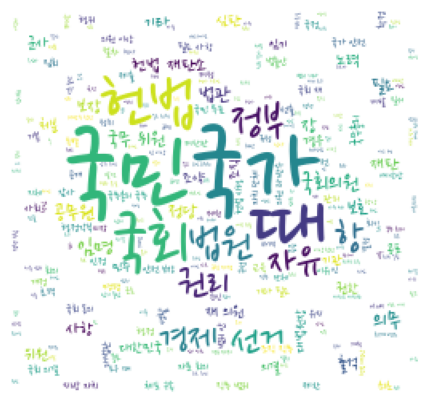

In [38]:
mask3 = cv2.imread('data/test2.jpg')
wordcloud = WordCloud(
                #font_path='C:/Windows/Fonts/한컴 고딕/Hancom Gothic Regular.ttf',
                font_path='data/NanumPenScript-Regular.ttf',
                # width=800, # 생성될 이미지 가로(픽셀)
                background_color='white', # 배경색
                max_words=300, # 표시될 단어의 최대갯수
                #relative_scaling=0.9, # 단어 빈도에 따른 크기 차이 조정
                colormap='viridis', # 글씨 컬러맵
                #random_state=3,
                stopwords=불용어,
                mask=mask3
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

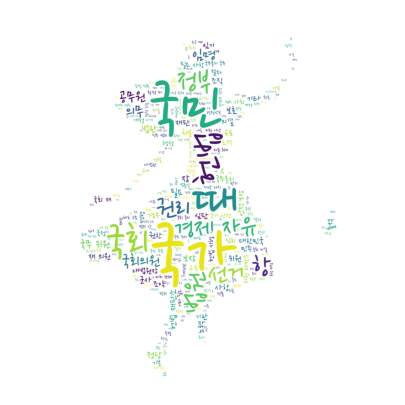

In [39]:
mask4 = cv2.imread('data/test3.png')
mask4.shape
wordcloud = WordCloud(
                #font_path='C:/Windows/Fonts/한컴 고딕/Hancom Gothic Regular.ttf',
                font_path='data/NanumPenScript-Regular.ttf',
                # width=800, # 생성될 이미지 가로(픽셀)
                background_color='white', # 배경색
                max_words=300, # 표시될 단어의 최대갯수
                #relative_scaling=0.9, # 단어 빈도에 따른 크기 차이 조정
                colormap='viridis', # 글씨 컬러맵
                #random_state=3,
                stopwords=불용어,
                mask=mask4
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(900, 900)


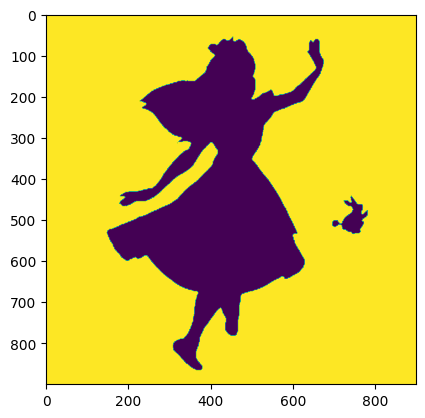

In [40]:
img = Image.open('data/test3.png')
mask5 = np.array(img)
print(mask5.shape)
plt.imshow(mask5)

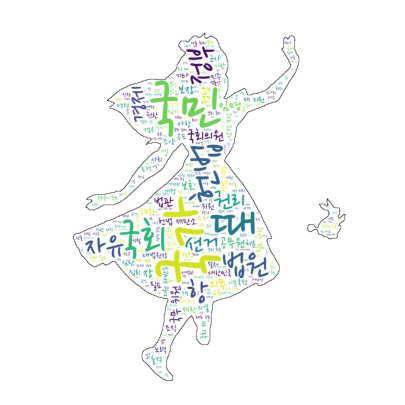

In [41]:
wordcloud = WordCloud(
                #font_path='C:/Windows/Fonts/한컴 고딕/Hancom Gothic Regular.ttf',
                font_path='data/NanumPenScript-Regular.ttf',
                # width=800, # 생성될 이미지 가로(픽셀)
                background_color='white', # 배경색
                max_words=300, # 표시될 단어의 최대갯수
                #relative_scaling=0.9, # 단어 빈도에 따른 크기 차이 조정
                colormap='viridis', # 글씨 컬러맵
                #random_state=3,
                stopwords=불용어,
                mask=mask5,
                contour_color='black',
                contour_width=1
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(1124, 720, 3)


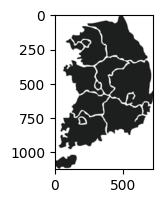

In [42]:
# convert('RGB') : 1채널이미지 ->3채널
# convert('RGBA') : 1채널이미지 -> 4채널(RGB+투명도채널)
img = Image.open('data/south_korea.png').convert('RGB')
mask5 = np.array(img)
print(mask5.shape)
plt.figure(figsize=(2,2))
plt.imshow(mask5)

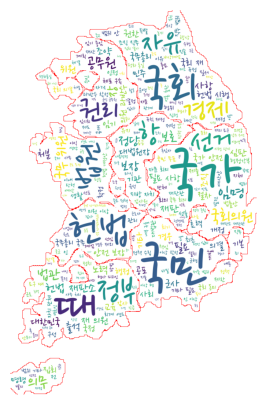

In [43]:
wordcloud = WordCloud(
                #font_path='C:/Windows/Fonts/한컴 고딕/Hancom Gothic Regular.ttf',
                font_path='data/NanumPenScript-Regular.ttf',
                # width=800, # 생성될 이미지 가로(픽셀)
                background_color='white', # 배경색
                max_words=300, # 표시될 단어의 최대갯수
                #relative_scaling=0.9, # 단어 빈도에 따른 크기 차이 조정
                colormap='viridis', # 글씨 컬러맵
                #random_state=3,
                stopwords=불용어,
                mask=mask5,
                contour_color='red',
                contour_width=1
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [44]:
# 생성된 wordcloud 저장
wordcloud.to_file('korea.jpg') # jpg나 png

## 단어의 빈도수 시각화(nltk.Text)

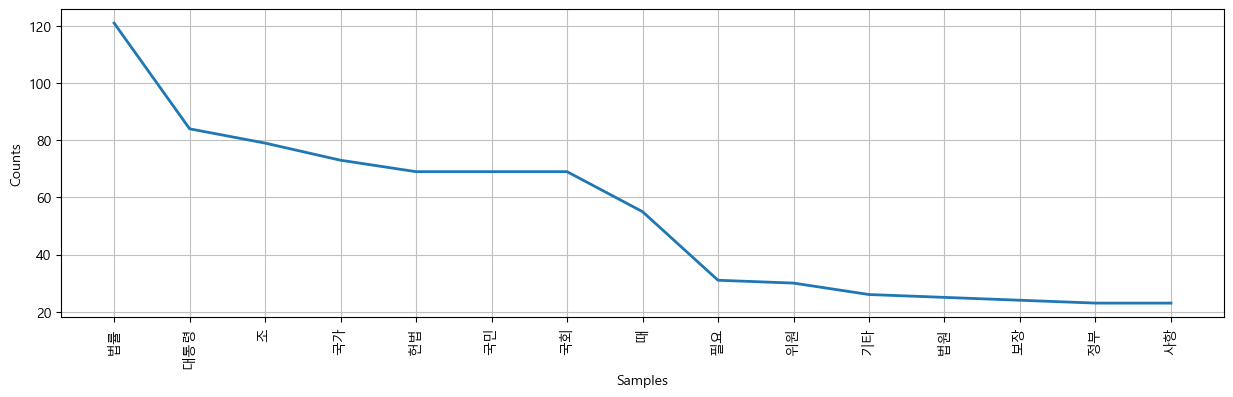

In [45]:
import nltk
data_text = nltk.Text(noun_list)
plt.figure(figsize=(15,4))
plt.rc('font', family='Malgun Gothic')
data_text.plot(15)
plt.show()

In [46]:
data_text.vocab().most_common(15)

[('법률', 121),
 ('대통령', 84),
 ('조', 79),
 ('국가', 73),
 ('헌법', 69),
 ('국민', 69),
 ('국회', 69),
 ('때', 55),
 ('필요', 31),
 ('위원', 30),
 ('기타', 26),
 ('법원', 25),
 ('보장', 24),
 ('정부', 23),
 ('사항', 23)]

('법률', '대통령', '조', '국가', '헌법', '국민', '국회', '때', '필요', '위원', '기타', '법원', '보장', '정부', '사항')
(121, 84, 79, 73, 69, 69, 69, 55, 31, 30, 26, 25, 24, 23, 23)


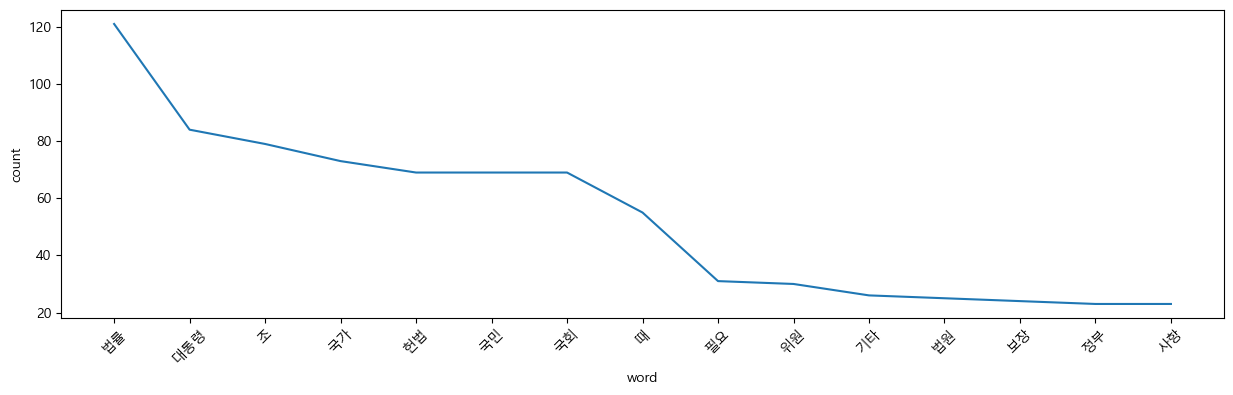

In [47]:
word, counts = zip(*data_text.vocab().most_common(15))
print(word)
print(counts)
plt.figure(figsize=(15,4))
plt.plot(word, counts)
plt.xticks(rotation=45)
plt.xlabel('word')
plt.ylabel('count')
plt.show()

# 6. 워드 임베딩
- 단어간 벡터 계산 -> 단어간 유사성 도출

In [48]:
import requests
from bs4 import BeautifulSoup
rss_url = 'https://fs.jtbc.co.kr/RSS/economy.xml'
jtbc_response = requests.get(rss_url)
soup = BeautifulSoup(jtbc_response.content, "xml")
link_el = soup.select('item link')
link_list = [el.text for el in link_el]
link_list

['https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220943',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220949',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220832',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220765',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220766',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220665',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220651',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220627',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220516',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220366',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220365',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220169',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220180',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12219888',
 'https://news.jtbc.co.kr/article/article.aspx?n

In [52]:
'''각 link들의 뉴스 기사 -> 명사만 :
    [['드촌','재건축','명사1',....],
     ['캠핑장', '재건축','명사2',...],
     ....,
     ]
'''
from konlpy.tag import Kkma
kkma = Kkma()
news = []
for link in link_list :
    response = requests.get(link)
#     print(response.status_code)
    news_soup = BeautifulSoup(response.content, "html.parser")
    title = news_soup.select_one('title').text
    description = str(news_soup.select_one('meta[name="description"]'))
    noun_list = kkma.nouns(title + ' ' + description)
    불용어 = {'뉴스', '앵커'}
    noun_list = [word for word in noun_list if word not in 불용어]
    news.append(noun_list)
print(news)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


In [53]:
# rss의 title과 description => 명사 추출 => 워드임베딩(단어간 벡터(거리) 계산 => 특정 단어의 유사도)
import requests
from bs4 import BeautifulSoup
rss_url = 'https://fs.jtbc.co.kr/RSS/economy.xml'
jtbc_response = requests.get(rss_url)
soup = BeautifulSoup(jtbc_response.content, "xml")
news = []
item_elems = soup.find_all('item')
for item_elem in item_elems :
    title = item_elem.find('title').text
    description = item_elem.find('description').text
#     print(title + ' ' + description)
    article = title + ' ' + description.replace('[앵커]', ' ')
    noun_list = kkma.nouns(article)
    # 보통명사(NNG), 고유명사(NNP)
    noun_list = [word for word, tag in kkma.pos(article) if tag in ('NNG', 'NNP')]
    news.append(noun_list)
print(news[:3])

java.lang.NullPointerException: java.lang.NullPointerException: Cannot invoke "org.snu.ids.ha.dic.Dictionary.getMExpression(String)" because "this.dic" is null

In [54]:
# 워드 임베딩(단어간 거리 계산)
# pip install gensim
from gensim.models import Word2Vec
model = Word2Vec(news, #학습 데이터 2차원
                 window=10, # 각 단어의 좌우 10개 단어를 학습 컨텐츠로 사용
                 min_count=2, # 학습데이터에서 2회 이상 등장한 단어만 학습
                 workers=-1 #  병렬처리 core 수, -1:모든 가용 코어 사용
                )

RuntimeError: you must first build vocabulary before training the model

In [ ]:
model.wv.most_similar('아파트')

In [ ]:
model.wv.most_similar('아파트', topn=3)